# **scNET: Learning Context-Specific Gene and Cell Embeddings by Integrating Single-Cell Gene Expression Data with Protein-Protein Interaction Information**

In [23]:
import os, numpy as np, pandas as pd, scanpy as sc

def save_model(model_name, obj, embedded_genes, embedded_cells,
               node_features, out_features, recon_obj=None,
               base_dir="scnet_saved"):

    save_dir = os.path.join(base_dir, model_name)
    os.makedirs(save_dir, exist_ok=True)

    # ---- 保存 AnnData ----
    obj.write(os.path.join(save_dir, f"{model_name}_obj.h5ad"))
    if recon_obj is not None:
        recon_obj.write(os.path.join(save_dir, f"{model_name}_recon.h5ad"))

    # ---- 保存 numpy embedding ----
    np.save(os.path.join(save_dir, "embedded_genes.npy"), embedded_genes)
    np.save(os.path.join(save_dir, "embedded_cells.npy"), embedded_cells)
    np.save(os.path.join(save_dir, "out_features.npy"), out_features)

    # ---- 保存 node_features ----
    if hasattr(node_features, "to_csv"):
        node_features.to_csv(os.path.join(save_dir, "node_features.csv"))
    else:
        np.save(os.path.join(save_dir, "node_features.npy"), node_features)

    print(f"✅ 已成功保存模型 {model_name} → {save_dir}")


In [24]:
def load_model(model_name, base_dir="scnet_saved"):
    load_dir = os.path.join(base_dir, model_name)

    # ---- 加载 AnnData ----
    obj = sc.read_h5ad(os.path.join(load_dir, f"{model_name}_obj.h5ad"))

    recon_path = os.path.join(load_dir, f"{model_name}_recon.h5ad")
    recon_obj = sc.read_h5ad(recon_path) if os.path.exists(recon_path) else None

    # ---- 加载 embedding ----
    embedded_genes = np.load(os.path.join(load_dir, "embedded_genes.npy"))
    embedded_cells = np.load(os.path.join(load_dir, "embedded_cells.npy"))
    out_features   = np.load(os.path.join(load_dir, "out_features.npy"))

    # ---- 加载 node_features ----
    node_csv = os.path.join(load_dir, "node_features.csv")
    if os.path.exists(node_csv):
        node_features = pd.read_csv(node_csv, index_col=0)
    else:
        node_features = np.load(os.path.join(load_dir, "node_features.npy"))

    print(f"📦 已加载模型：{model_name}")
    return obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj


**Install scnet using pip**

**It may be necessary to restart (not delete) the runtime after installing scNET in Google Colab. We are working on fixing this issue in future releases.**

In [3]:
!pip install scnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

**Download example data**

In [2]:
import gdown
download_url = f'https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi'
output_path = './example.h5ad'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi
From (redirected): https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi&confirm=t&uuid=4bb70d07-4886-4fc9-a704-695bdfb20ae6
To: /content/example.h5ad
100%|██████████| 1.36G/1.36G [00:17<00:00, 77.8MB/s]


'./example.h5ad'

# Import scNET and model traning

In [3]:
import scNET
import scanpy as sc

#For faster processing in medium to large datasets (e.g. 30K or above cells), the maximum cells batch size can be increased depending on the available GPU memory.

# #For GPU with 24GB memory
# scNET.main.MAX_CELLS_BATCH_SIZE = 3000

# #for GPU with 40GB memory
# scNET.main.MAX_CELLS_BATCH_SIZE = 4000

# #For GPU with 80GB memory or more
# scNET.main.MAX_CELLS_BATCH_SIZE = 8000

# #otherwize, do not change the default value

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#To control the cutoff of gene expression, the minimum precetage of cells expressing a gene can be adjusted. The default all expressed genes are considered.
#For example, to consider genes expressed in at least 5% of cells
scNET.main.EXPRESSION_CUTOFF = 0.05

In [5]:
#For larger dataset (10K or above), containing larger number of subcommunities, the number of encoder layers could be increased to 4 or more. the default value is 3.
scNET.main.NUM_LAYERS = 2

In [6]:
#To control the number of deifferentially expressed genes, the default value is 2000
#For example, to consider 3500 DE genes
scNET.main.DE_GENES_NUM = 800


In [8]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html


Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0+cu118, 2.2.1+cu118, 2.2.2+cu118, 2.3.0+cu118, 2.3.1+cu118, 2.4.0+cu118, 2.4.1+cu118, 2.5.0+cu118, 2.5.1+cu118, 2.6.0+cu118, 2.7.0+cu118, 2.7.1+cu118)
ERROR: No matching distribution found for torch==2.0.1
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ e

## run_scNET arguments:
 **obj (AnnData, optional):** AnnData obj.

  **pre_processing_flag (bool, optional):** If True, perform pre-processing steps.

  **human_flag (bool, optional):** Controls gene name casing in the network.

  **number_of_batches (int, optional):** Number of mini-batches for the training.

  **split_cells (bool, optional):** If True, split by cells instead of edges during training. If using A100 could be True (for 10K cells or less)

  **n_neighbors (int, optional):** Number of neighbors for building the adjacency graph.

  **max_epoch (int, optional):** Max number of epochs for model training (recommended 250-300, and for larger dataset consider also 300-350).

  **model_name (str, optional):** Identifier for saving the model outputs.
  
  **save_model_flag (bool, optional):** If True, save the trained model.

In [9]:
obj = sc.read_h5ad("./example.h5ad")
scNET.run_scNET(obj, pre_processing_flag=False, human_flag=False, number_of_batches=5, split_cells=True, max_epoch=150, model_name = "test")


/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (7107, 9019)
Highly variable genes: 3501


Training: 100%|██████████| 150/150 [44:51<00:00, 17.94s/it]

Best Network AUC: 0.8810975733431438



# Using the model's outputs

**Load all the relevant embeddings**


In [ ]:
save_model(
    model_name="test",
    obj=obj,
    embedded_genes=embedded_genes,
    embedded_cells=embedded_cells,
    node_features=node_features,
    out_features=out_features,
    recon_obj=recon_obj   # 如果你构建了 recon_obj
)


In [ ]:
obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj = load_model("test")


In [10]:
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("test")

**Create Scanpy object based on the reconstructed gene expression**


In [11]:
cell_types = {"0":"Macrophages","1":"Macrophages","2":"CD8 Tcells","3":"Microglia","4":"Cancer","5":"CD4 Tcells","6":"B Cells","10":"Prolifrating Tcells","8":"Cancer","11":"NK"}
obj.obs["Cell Type"] = obj.obs.seurat_clusters.map(cell_types)
recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

**Plot marker genes**

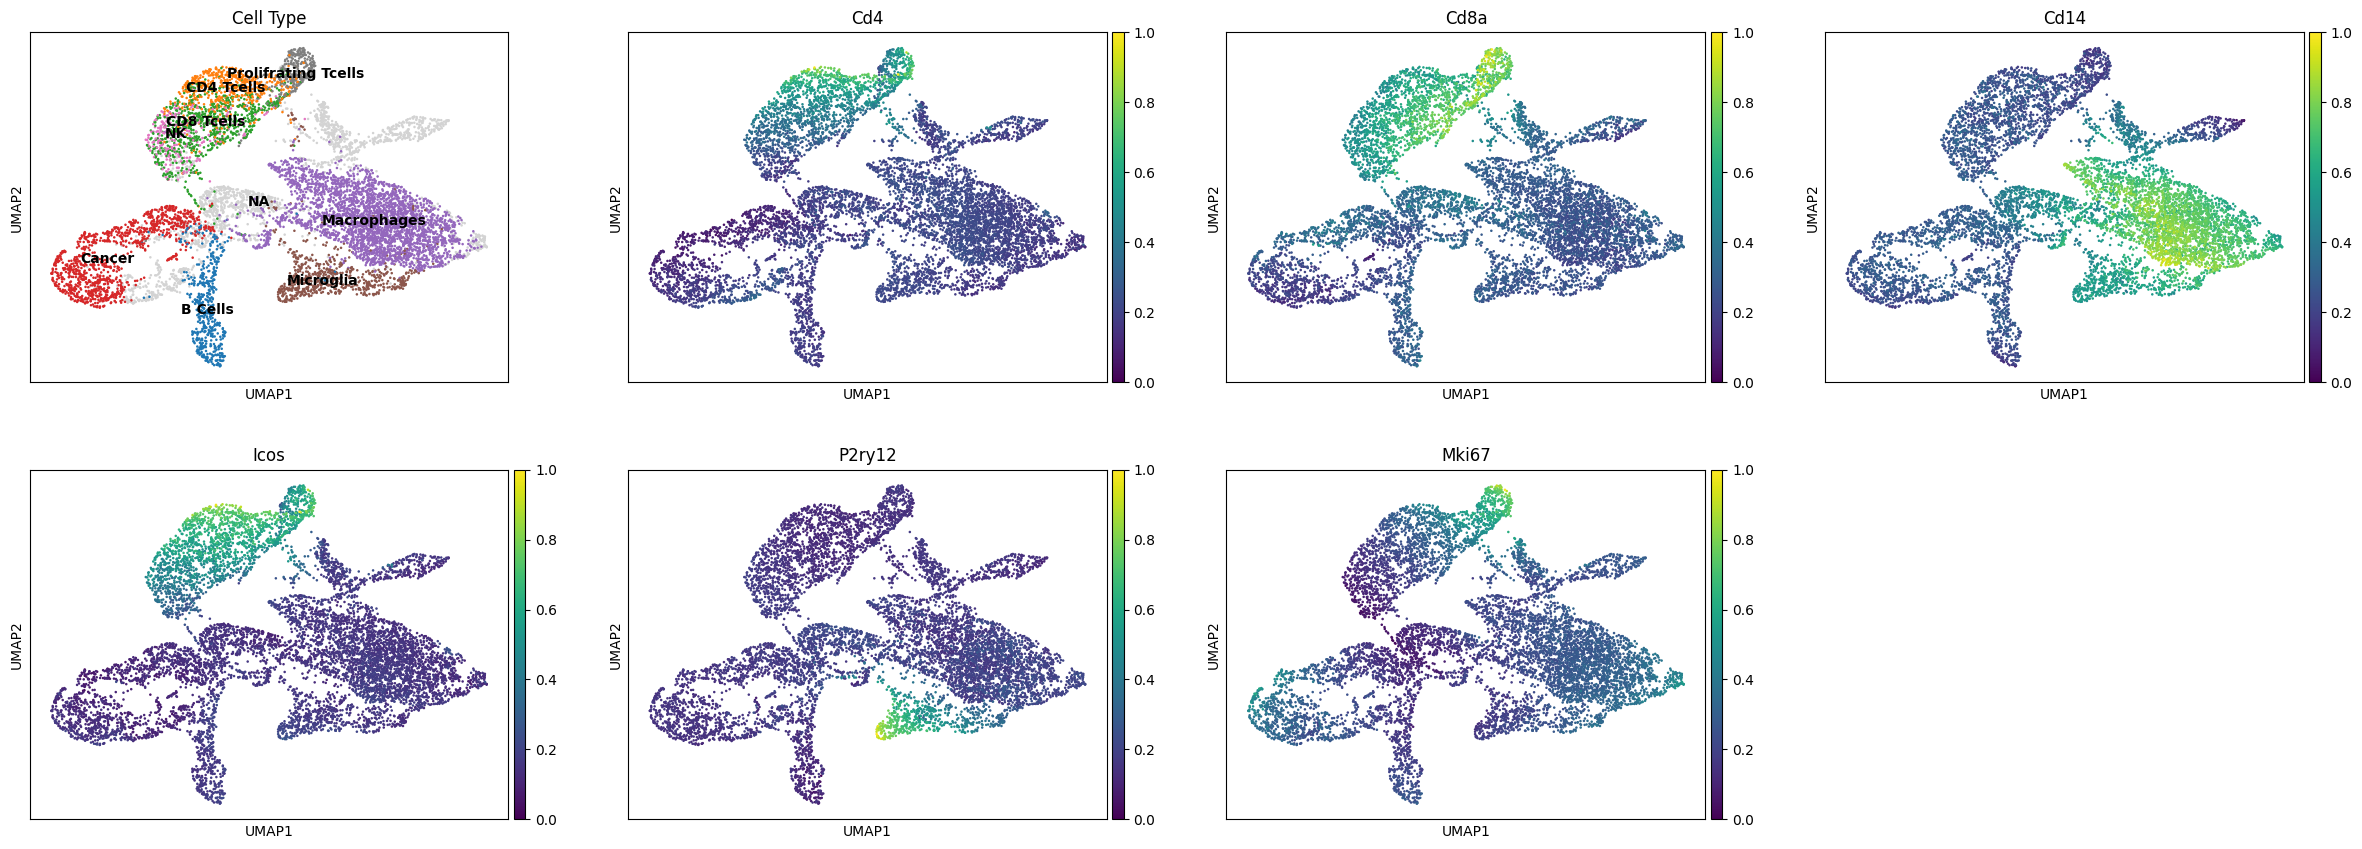

In [14]:
sc.pl.umap(recon_obj, color=["Cell Type","Cd4","Cd8a","Cd14","Icos","P2ry12","Mki67"], show=True, legend_loc='on data')

**Example of Calculating Marker Gene AUPR**

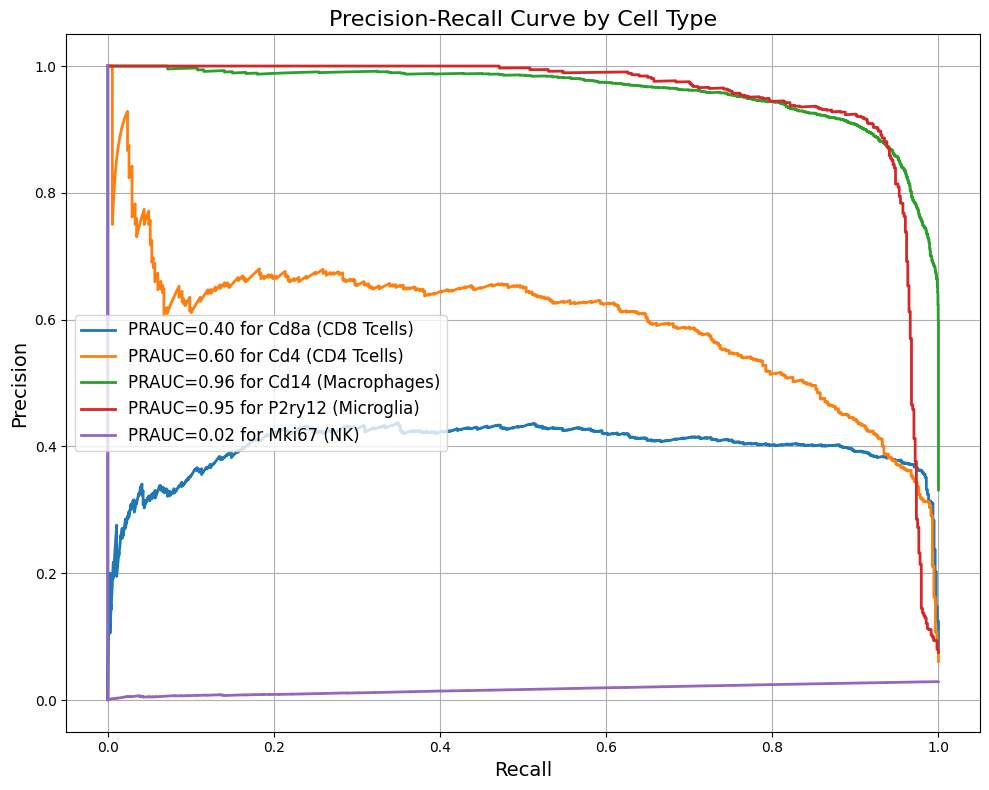

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from itertools import cycle

def calculate_marker_gene_aupr(adata, marker_genes, cell_types):
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
    plt.figure(figsize=(10, 8))

    for marker_gene, cell_type, color in zip(marker_genes, cell_types, colors):
        gene_expression = adata[:, marker_gene].X.toarray().flatten()
        binary_labels = (adata.obs["Cell Type"].isin(cell_type)).astype(int)

        precision, recall, _ = precision_recall_curve(binary_labels, gene_expression)
        aupr = auc(recall, precision)
        plt.plot(recall, precision, color=color, lw=2,
                 label=f'PRAUC={aupr:.2f} for {marker_gene} ({cell_type[0]})')

    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve by Cell Type', fontsize=16)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#calculate_marker_gene_aupr(recon_obj,['Cd8a','Cd4','Cd14',"P2ry12","Ncr1","Mki67","Tert"],[["CD8 Tcells"],['CD4 Tcells'], ['Macrophages'], ['Microglia'], ["NK"],["Prolifrating Tcells"],["Cancer"]])
calculate_marker_gene_aupr(recon_obj,['Cd8a','Cd4','Cd14',"P2ry12","Mki67"],[["CD8 Tcells"],['CD4 Tcells'], ['Macrophages'], ['Microglia'], ["NK"],["Prolifrating Tcells"],["Cancer"]])




## GO Semantic Similarity

Download the Semantic Similarity table calculated using the GoSemSim package in R.



In [18]:
import gdown
download_url = f'https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU'
output_path = './sim.csv'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU
From (redirected): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU&confirm=t&uuid=81d31b29-48e2-4829-8894-5d6add5e1f12
To: /content/sim.csv
100%|██████████| 868M/868M [00:14<00:00, 58.3MB/s]


'./sim.csv'

Filter out uninformative genes

In [19]:
import pandas as pd
import numpy as np
sim = pd.read_csv("./sim.csv", index_col=0)
fil = (sim == 1).sum() > 4000
sim = sim.loc[~fil,~fil]
sim

,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,...,MATN4,SRMS,IGLV11-55,RASL10A,RBFOX2,SLC16A8,TAFA5,MIOX,TREX2,AVPR2
NOC2L,1.000,0.230,0.287,0.270,0.232,0.276,0.232,0.339,0.156,0.145,...,0.206,0.236,0.169,0.354,0.334,0.019,0.199,0.087,0.347,0.280
KLHL17,0.230,1.000,0.112,0.074,0.183,0.367,0.191,0.124,0.267,0.086,...,0.334,0.227,0.116,0.156,0.199,0.051,0.171,0.090,0.124,0.171
PLEKHN1,0.287,0.112,1.000,0.200,0.185,0.179,0.253,0.285,0.115,0.149,...,0.078,0.169,0.165,0.196,0.273,0.035,0.170,0.120,0.272,0.165
HES4,0.270,0.074,0.200,1.000,0.137,0.227,0.138,0.329,0.128,0.205,...,0.057,0.130,0.138,0.118,0.436,0.031,0.110,0.104,0.413,0.147
ISG15,0.232,0.183,0.185,0.137,1.000,0.284,0.256,0.271,0.126,0.170,...,0.178,0.456,0.226,0.645,0.233,0.030,0.192,0.255,0.429,0.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC16A8,0.019,0.051,0.035,0.031,0.030,0.036,0.042,0.041,0.073,0.021,...,0.030,0.031,0.074,0.035,0.031,1.000,0.036,0.016,0.027,0.037
TAFA5,0.199,0.171,0.170,0.110,0.192,0.312,0.486,0.151,0.122,0.062,...,0.137,0.314,0.148,0.736,0.305,0.036,1.000,0.083,0.113,0.431
MIOX,0.087,0.090,0.120,0.104,0.255,0.101,0.101,0.108,0.078,0.145,...,0.062,0.155,0.105,0.069,0.194,0.016,0.083,1.000,0.215,0.097
TREX2,0.347,0.124,0.272,0.413,0.429,0.364,0.209,0.426,0.114,0.351,...,0.092,0.382,0.231,0.098,0.791,0.027,0.113,0.215,1.000,0.207


Find the intersection between the genes in the similarity matrix and the genes in the embedding, reconstructed gene expression, or counts matrix.



In [20]:
row_embedding_df = pd.DataFrame(embedded_genes, index=list(map(lambda x: x.upper(), node_features.index)))
inter = row_embedding_df.index.intersection(sim.index)
row_embedding_df = row_embedding_df.loc[inter]
sim = sim.loc[inter,inter]
row_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
ABL1,0.140042,0.141512,0.056118,-0.023051,-0.394178,0.386304,0.126135,-0.347347,-0.045315,-0.213535,...,0.338229,0.330024,0.126577,0.156405,-0.419632,-0.005322,0.073538,-0.355285,-0.156666,0.346552
CDKN1A,0.348253,0.267388,0.132281,-0.044447,-0.219056,0.070829,0.184181,-0.443474,-0.134537,0.205680,...,0.403627,0.267190,0.335701,0.395855,-0.439416,0.029337,-0.166503,-0.167597,-0.098855,-0.080110
PARP1,0.455966,0.424617,0.140939,-0.052155,-0.186822,-0.047515,0.242589,-0.668389,-0.150552,0.400177,...,0.356767,0.186496,0.272594,0.492328,-0.546267,-0.063329,-0.279671,-0.090301,-0.013370,-0.267313
AKT1,0.298530,0.179277,-0.007267,-0.138428,-0.445934,0.540832,0.276090,-0.636577,-0.176739,-0.300276,...,0.368981,0.456572,0.177407,0.236578,-0.545829,0.129783,0.212666,-0.660909,-0.234118,0.392908
APP,1.429997,1.461982,0.752319,-1.441431,-1.165589,-0.628128,1.876839,-1.741629,-2.379736,-0.900030,...,-1.251160,0.627171,-0.776314,0.009819,-0.618338,-0.816909,-0.222444,-0.513645,2.407455,0.185327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPM3,-0.064172,-0.120249,-0.052386,0.036591,-0.008214,-0.027657,-0.064758,-0.002833,0.048725,0.063018,...,-0.043800,0.021783,0.056160,-0.088054,0.206804,0.063616,-0.128893,0.057850,-0.004340,-0.091754
DPM2,-0.119406,-0.168571,-0.086534,0.032801,0.015259,-0.041934,-0.097250,0.057280,0.140100,0.101556,...,-0.087834,-0.020416,0.086592,-0.106580,0.282807,0.085745,-0.111155,0.114770,-0.020348,-0.181217
BORCS7,-0.149590,-0.111998,-0.045908,0.110166,0.028165,-0.047511,-0.156287,0.146658,0.094659,0.044046,...,0.038201,-0.062168,0.003796,0.008088,0.131820,0.065585,-0.050554,0.141534,-0.038271,-0.000590
KDM7A,-0.120019,-0.122356,-0.097702,0.069885,-0.007313,-0.099278,-0.036405,-0.008637,0.195014,0.155401,...,-0.071216,0.052130,0.130301,0.000448,0.188356,0.093492,-0.218142,0.163265,-0.005454,-0.186129


In [21]:
out_features_df = pd.DataFrame(out_features.T, index=list(map(lambda x: x.upper(), node_features.index)))
out_features_df = out_features_df.loc[inter]
out_features_df

,0,1,2,3,4,5,6,7,8,9,...,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014
ABL1,-0.022962,0.005333,-0.019145,-0.080239,-0.065360,-0.018783,-0.045399,-0.033535,-0.038814,-0.047447,...,-0.003796,0.021919,-0.304034,-0.069877,-0.049705,-0.040737,-0.058684,-0.355752,-0.118084,0.011741
CDKN1A,-0.063016,0.159605,0.011917,-0.039164,0.039472,0.060603,0.030593,0.026641,0.066227,-0.006588,...,-0.081223,-0.041243,-0.212266,0.096755,0.079172,-0.112813,0.094892,-0.309789,-0.013507,-0.048682
PARP1,0.169461,0.065708,0.240467,0.160789,0.018007,0.054534,-0.050489,0.204049,0.047912,0.073328,...,0.095482,0.202975,-0.194973,0.007209,0.023936,0.086881,-0.000602,-0.282738,0.006572,0.200557
AKT1,0.039131,0.173658,0.190882,0.082523,-0.029245,0.062506,-0.013059,0.227066,0.038654,0.010955,...,0.001192,0.091077,-0.404647,0.024913,0.012314,-0.045753,0.015726,-0.416717,-0.034701,0.067159
APP,0.153093,0.312561,0.375956,0.300589,0.139521,-0.023910,-0.003094,0.373846,0.140189,0.177950,...,0.067975,0.154878,-0.111553,0.133512,0.125778,0.056936,0.111421,-0.250407,0.179620,0.151210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPM3,0.207432,0.155588,0.231048,0.195816,-0.031624,-0.087092,-0.087580,0.220870,0.053881,0.001207,...,0.119857,0.179793,-0.058646,-0.027314,-0.021878,0.137488,-0.049658,-0.207054,0.070957,0.190929
DPM2,0.061501,-0.190357,0.066317,0.069814,0.008762,-0.019247,-0.051536,0.062093,0.051287,0.011105,...,-0.053690,0.038915,-0.137324,0.028645,0.010311,-0.048968,-0.004403,-0.382323,-0.062584,0.033549
BORCS7,-0.042635,-0.043161,-0.112758,-0.088542,0.005224,0.008925,0.062453,-0.151177,-0.021498,-0.004944,...,-0.018652,-0.058772,0.258008,0.006274,-0.003138,0.021327,0.008898,0.353824,0.034745,-0.065458
KDM7A,-0.202343,-0.138743,-0.167776,-0.164843,-0.009042,-0.037243,0.090358,-0.094134,-0.005079,-0.023991,...,-0.083628,-0.188553,-0.140470,0.035647,0.015026,-0.097163,0.037205,-0.094398,-0.104596,-0.180602


In [22]:
node_features_df = pd.DataFrame(node_features.values, index=list(map(lambda x: x.upper(), node_features.index)))
node_features_df = node_features_df.loc[inter]
node_features_df

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
ABL1,0.631628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.896135,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.59506,0.000000,0.000000,0.000000,0.000000
CDKN1A,0.000000,2.513924,2.294897,0.000000,2.806467,1.902295,0.876684,0.000000,2.344279,0.483211,...,3.217964,0.000000,2.900149,0.0,2.315192,0.00000,2.505024,2.728701,0.700835,1.359743
PARP1,0.631628,0.000000,0.421933,0.000000,0.396074,0.000000,0.000000,0.987792,0.000000,0.807611,...,0.559209,0.845701,1.043937,0.0,0.000000,0.59506,0.000000,0.000000,0.000000,0.000000
AKT1,0.000000,0.000000,0.421933,0.000000,0.000000,1.486310,0.876684,0.445817,0.545261,0.483211,...,0.915721,0.845701,0.000000,0.0,0.924713,0.00000,0.000000,0.951786,0.700835,0.544530
APP,0.000000,3.165755,1.287726,0.877381,1.768115,0.760923,1.888837,1.595818,1.677162,1.786777,...,1.177998,0.000000,2.047441,0.0,1.396811,0.00000,0.877750,1.752844,0.700835,2.986629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPM3,0.000000,0.000000,0.717749,0.000000,0.396074,0.760923,1.336536,1.177751,0.545261,0.483211,...,0.915721,0.845701,0.800619,0.0,1.716215,0.00000,0.877750,0.951786,0.000000,0.000000
DPM2,1.015716,0.000000,0.000000,0.000000,0.396074,0.000000,0.000000,0.445817,0.000000,0.483211,...,0.000000,0.000000,0.000000,0.0,0.924713,0.00000,0.000000,0.951786,0.700835,0.895107
BORCS7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483211,...,0.000000,0.000000,0.800619,0.0,0.000000,0.00000,0.000000,0.000000,0.700835,0.544530
KDM7A,0.000000,0.000000,0.000000,0.000000,0.000000,1.486310,1.888837,0.000000,0.000000,0.483211,...,0.559209,1.297250,0.800619,0.0,0.000000,0.59506,0.000000,0.000000,0.000000,0.000000


Calculating the semantic similarity correlation

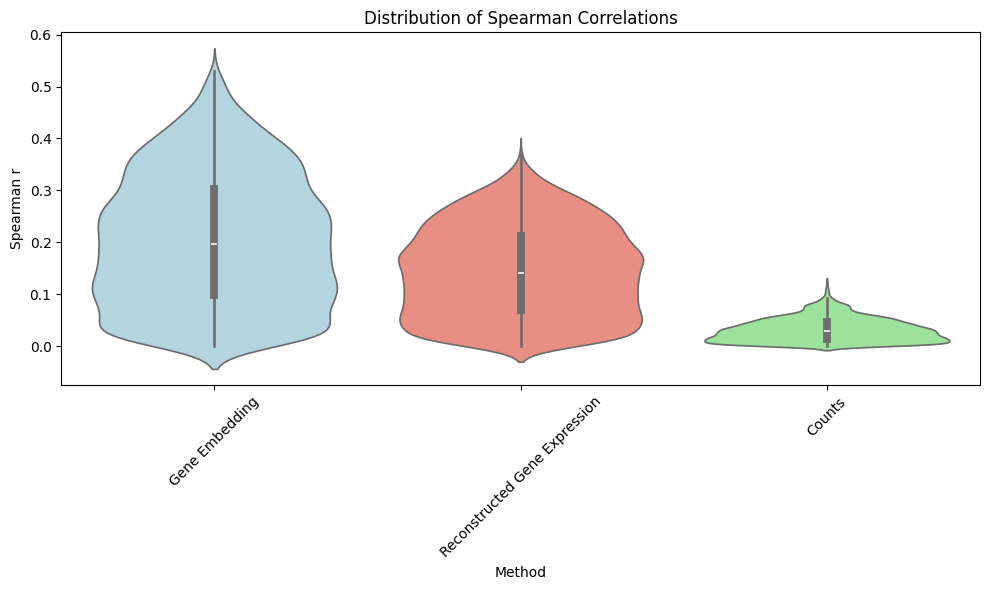

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import rankdata, spearmanr

def spearman_corr(matrix):
    ranked_matrix = np.apply_along_axis(rankdata, 1, matrix)
    return np.corrcoef(ranked_matrix)

def corr_analysis(corr, sim):
    sim_values = sim.values
    correlations = np.empty(sim.shape[0])
    for i in range(sim.shape[0]):
        correlations[i], _ = spearmanr(corr[i], sim_values[i])
    return np.abs(correlations)

def plot_corr_distributions(corr_matrices, names, sim):
    all_data = []

    for matrix, name in zip(corr_matrices, names):
        #corr = spearman_corr(matrix)
        corr = matrix.values @ matrix.T.values
        abs_corrs = corr_analysis(corr, sim)
        all_data.extend([(name, val) for val in abs_corrs])

    df = pd.DataFrame(all_data, columns=["Method","Correlation"])

    custom_palette = {
        names[0]: "lightblue",
        names[1]: "salmon",
        names[2]: "lightgreen"
    }

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Method", y="Correlation", data=df, palette=custom_palette)
    plt.title("Distribution of Spearman Correlations")
    plt.ylabel("Spearman r")
    plt.xlabel("Method")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_corr_distributions([row_embedding_df,out_features_df, node_features_df], names=["Gene Embedding","Reconstructed Gene Expression", "Counts"], sim=sim)

## **Propagation based signature projection for actvation of Tcells**



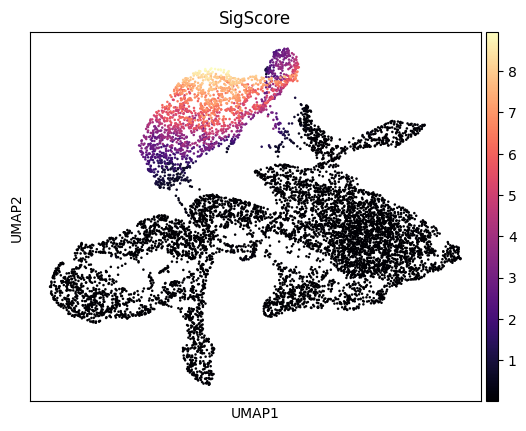

array([3.09187937e+00, 3.06783106e-02, 4.52159051e-03, ...,
       6.11820589e-02, 2.59116016e-03, 4.43702771e+00])

In [24]:
scNET.run_signature(recon_obj, up_sig=["Zap70","Lck","Fyn","Cd3g","Cd28","Lat"],alpha = 0.9)

**And for Tumor aggression**

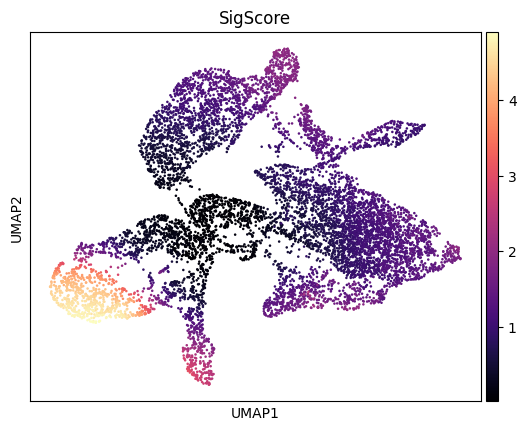

array([1.71072294, 1.94340789, 4.62881296, ..., 0.04333255, 1.73569024,
       1.84241335])

In [25]:

scNET.run_signature(recon_obj,up_sig=["Cdkn2a","Myc","Pten","Kras"])


**Creating the co-embedded network, is it modular?**

In [1]:
import networkx as nx
net, mod = scNET.build_co_embeded_network(embedded_genes, node_features)
print(f"The network mdularity: {mod}")

NameError: name 'scNET' is not defined

##  Reconstract KEGG Pathways Example



### Re-embed the T-cells subset

In [10]:
obj = sc.read_h5ad("./example.h5ad")
sub_obj = obj[obj.obs["Cell Type"] == "CD8 Tcells"]
scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=3, split_cells=False, max_epoch=50, model_name = "Tcells")
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("Tcells")

/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (5369, 753)


Training: 100%|██████████| 50/50 [1:09:01<00:00, 82.83s/it]


Best Network AUC: 0.8422797996666459


In [25]:
save_model(
    model_name="Tcells",
    obj=sub_obj,
    embedded_genes=embedded_genes_T,
    embedded_cells=embedded_cells_T,
    node_features=node_features_T,
    out_features=out_features_T,
    recon_obj=None
)


NameError: name 'embedded_genes_T' is not defined

In [ ]:
sub_obj, embedded_genes_T, embedded_cells_T, node_features_T, out_features_T, _ = load_model("Tcells")


In [15]:
from scNET import coEmbeddedNetwork  as cen
import pandas as pd
def run_pathway_recon_anaylsis(gene_embedding, ref, threshold=40):
    '''
    Predicts KEGG pathway memberships using gene embeddings and reference data, and evaluates the performance using AUPR.

    Args:
        gene_embedding (np.ndarray): The matrix of gene embeddings.
        ref (pd.DataFrame): A reference dataset containing gene expression or other relevant features.

    Returns:
        pd.DataFrame: A DataFrame containing the AUPR scores for predictions from the gene embeddings and reference data.

    Method:
        - Annotates genes with KEGG pathway memberships using `crate_kegg_annot`.
        - Filters KEGG pathways to include those with at least 40 gene members.
        - Constructs co-embedded networks from both the embeddings and reference data.
        - Uses propagation to predict pathway memberships for each graph.
        - Evaluates the predictions using AUPR and plots the results.
    '''
    ref.index = list(map(lambda x: x.upper(),ref.index))
    annot = cen.crate_kegg_annot(ref.index)
    annot_threshold = annot.sum()>=threshold
    annot_threshold = annot_threshold[annot_threshold == True].sort_values(ascending=False).head(50)
    graph_embedded,_ = cen.build_co_embeded_network(gene_embedding,ref)
    graph_ref,_ = cen.build_co_embeded_network(ref,ref)
    kegg_pred = [cen.make_term_predication([graph_embedded,graph_ref], annot[term]) for term in annot_threshold.index]

    kegg_pred = np.array(kegg_pred).squeeze()
    df = pd.DataFrame({"AUPR" : kegg_pred.T.reshape(-1), "Method": ["scNET" for i in range(kegg_pred.shape[0])]  +  ["Counts" for i in range(kegg_pred.shape[0])]})

    fig, ax = plt.subplots(figsize=[10,7])
    fig.set_dpi(600)

    custom_palette =  ['darkturquoise', 'lightsalmon']

    sns.boxenplot(ax=ax, data=df,x="Method", y="AUPR", palette=custom_palette)
    sns.set_theme(style='white',font_scale=1.5)
    plt.show()

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


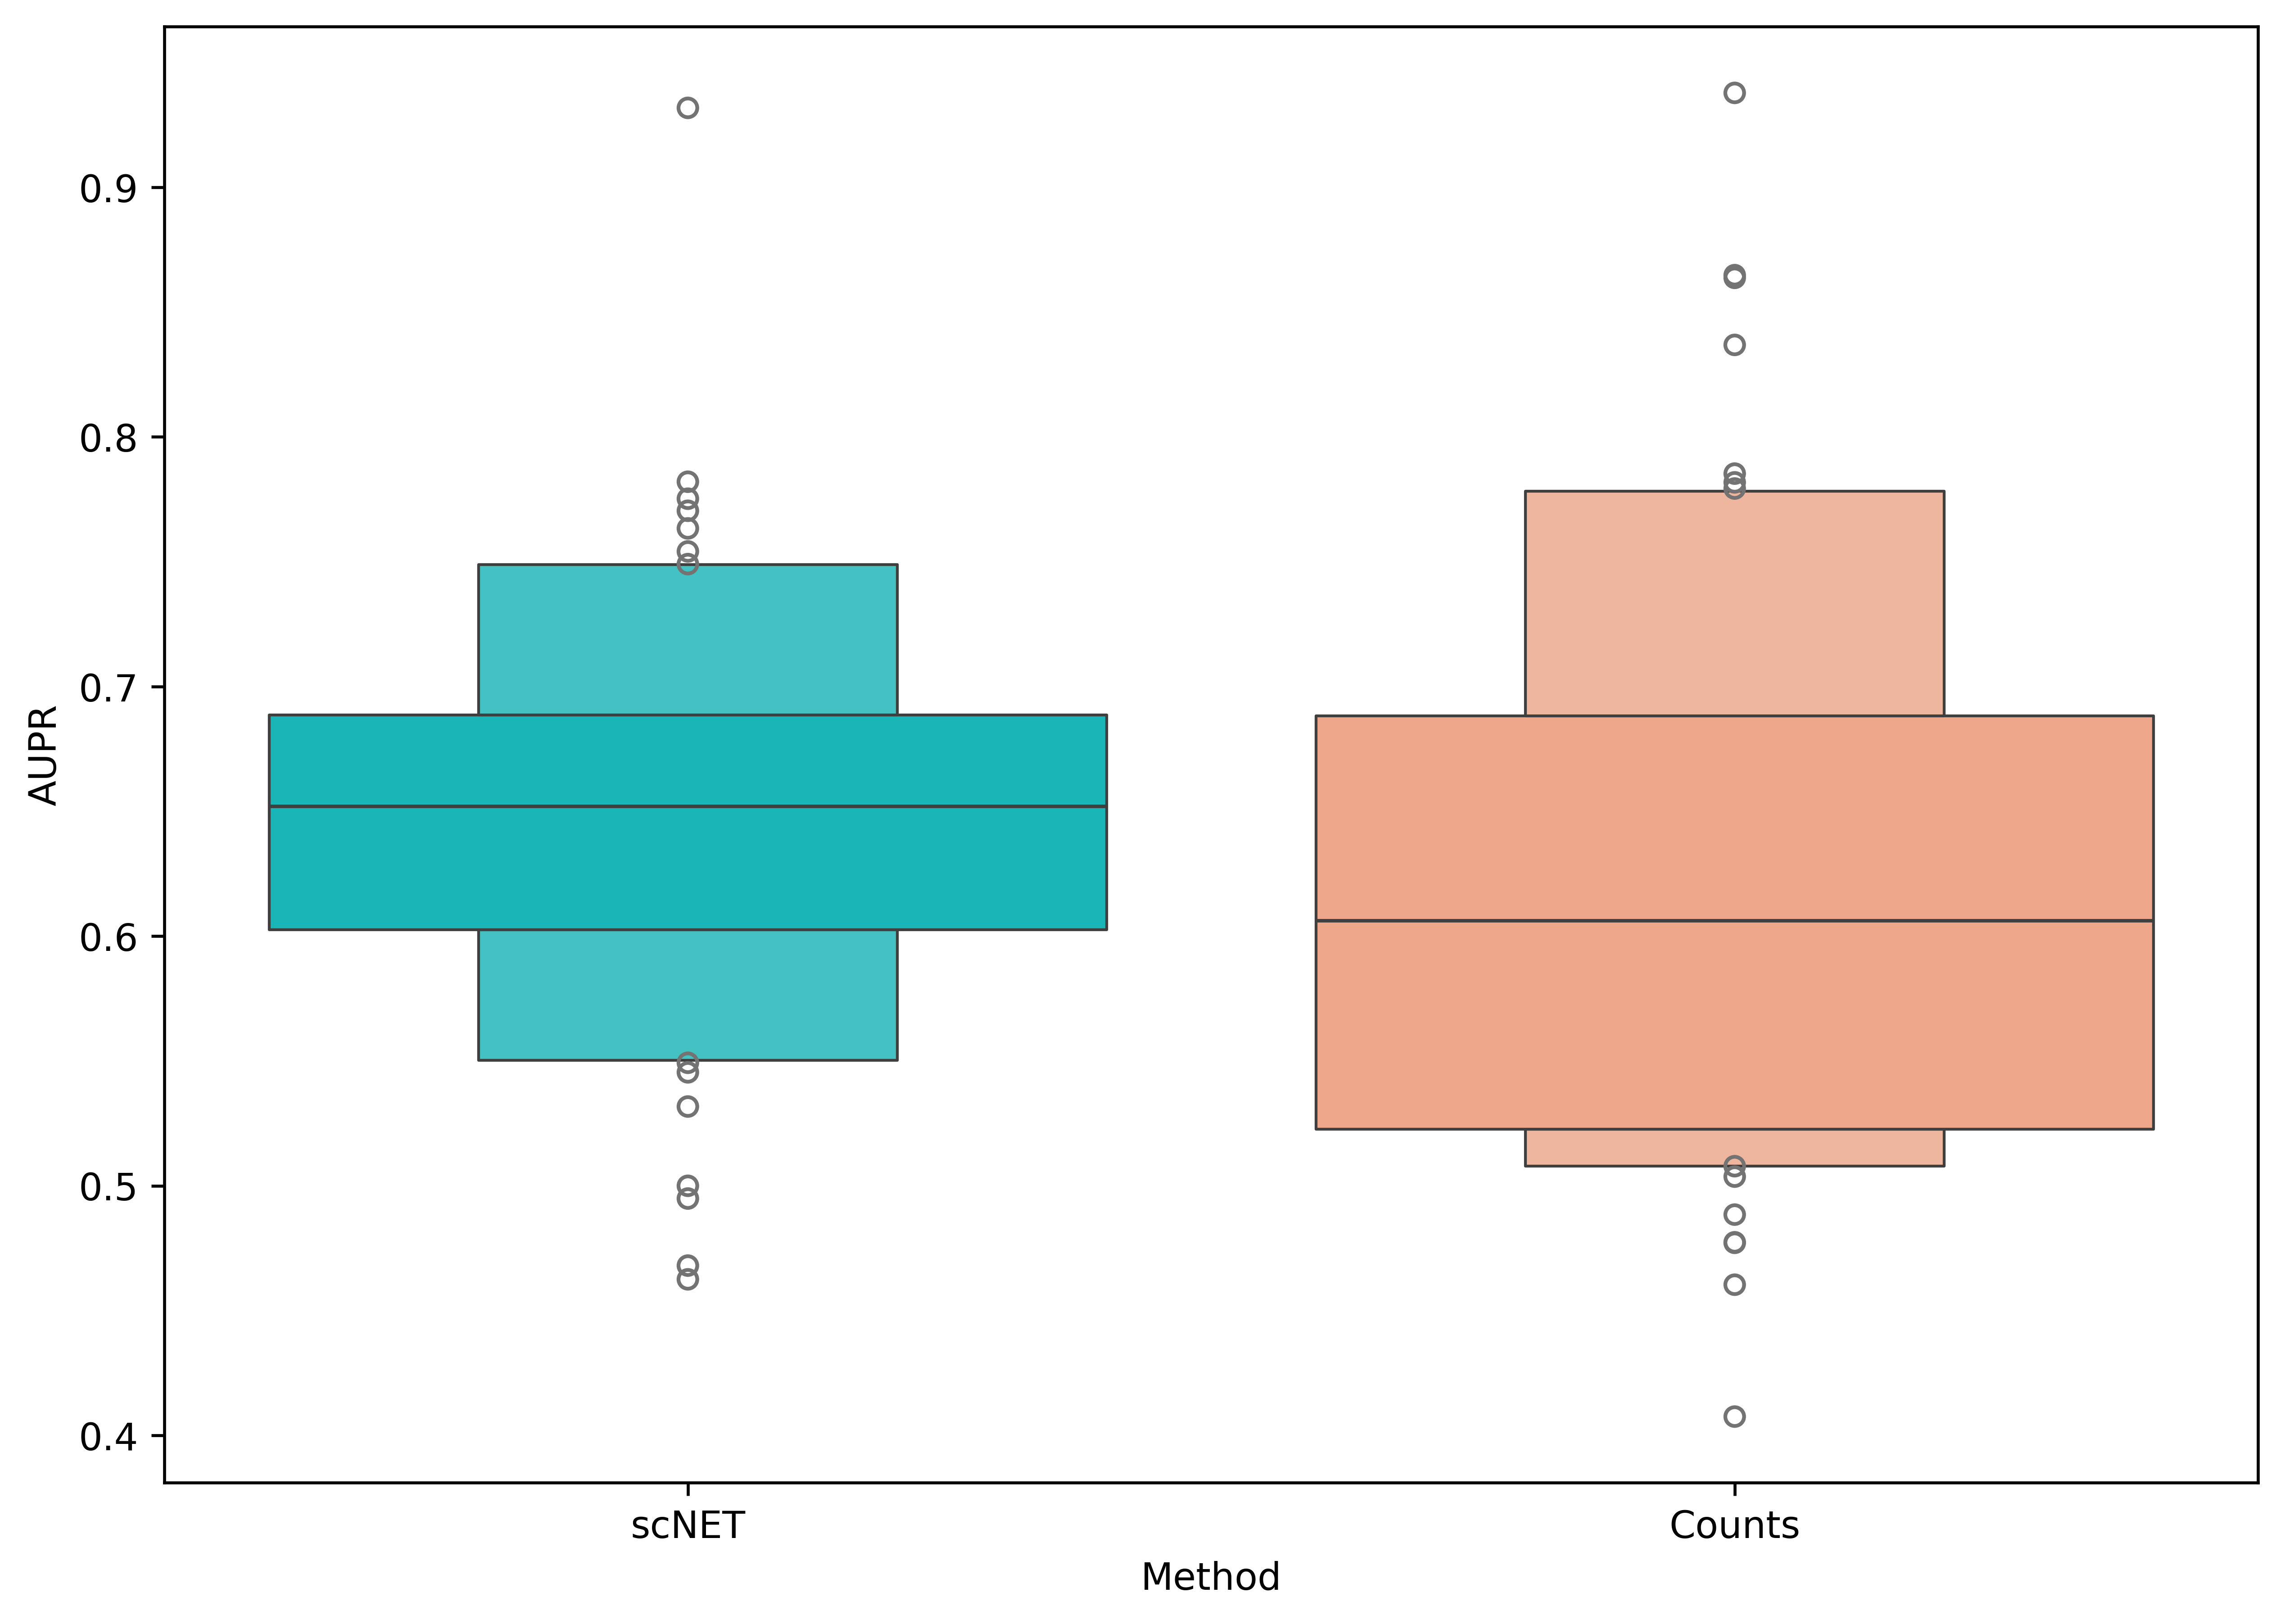

In [18]:

run_pathway_recon_anaylsis(embedded_genes,node_features)

In [21]:
# === 重新构建 recon_obj ===
# 假设前面已经成功得到这些变量:
# embedded_genes, embedded_cells, node_features, out_features, obj
recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

print("✅ recon_obj created successfully. Shape:", recon_obj.shape)


✅ recon_obj created successfully. Shape: (753, 5369)


**Finding differential enriched pathways**
### Can we see a difference in phenotype between Cancer, Microglia and Macrophages?








In [22]:
recon_obj.obs["Cell Type"] = recon_obj.obs.seurat_clusters.map(cell_types)
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(recon_obj.copy()[recon_obj.obs["Cell Type"].isin(["Microglia","Macrophages","Cancer"])],groupby="Cell Type")
scNET.plot_de_pathways(significant_pathways,enrichment_results,10)

NameError: name 'cell_types' is not defined